In [1]:
#import libraries
from skimage.filters import threshold_sauvola
import matplotlib.pyplot as plt
from skimage import data, io
from skimage.color import rgb2gray
from skimage.morphology import skeletonize, remove_small_objects
from skimage.filters import gaussian
#from skan.pre import threshold
import numpy as np
import numba

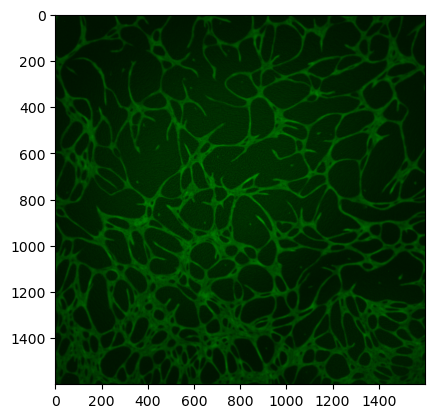

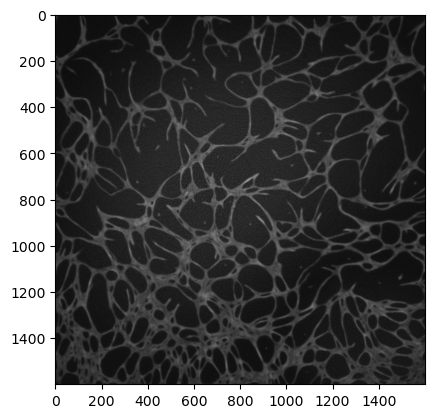

In [2]:
PATH = "//shares01.rdm.uq.edu.au/HKUG2023-A10939/20230304_075556_96 wel plate_2D co culture_ HAEC P2_ASC52 P8_20230303_4X_TIME LAPSE/WellC6/F2/MyExperiment_Wellc6_F2_000785.tif"
img = io.imread(PATH)
imgGrey = rgb2gray(img)
plt.imshow(img)
plt.figure()
plt.imshow(imgGrey, cmap='gray')

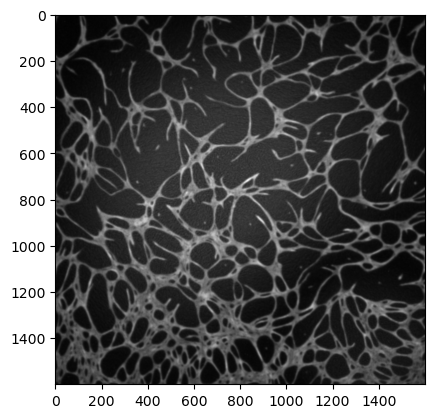

In [3]:
#Apply small gaussian blur
sigma = 2
blurred = gaussian(imgGrey, sigma=(sigma, sigma), truncate=3.5, channel_axis=-1)
plt.figure()
plt.imshow(blurred, cmap = 'gray')

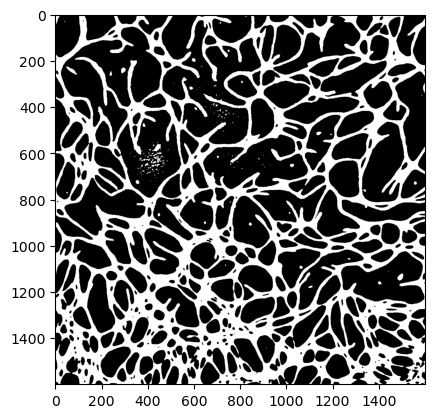

In [4]:
#Let's try some sauvola?
from skimage.filters import threshold_local
from skimage.morphology import disk
from skimage.filters.rank import otsu
import numpy as np

thresh = threshold_local(blurred , block_size = 301) 
bw = blurred > thresh

plt.imshow(bw, cmap = 'gray')

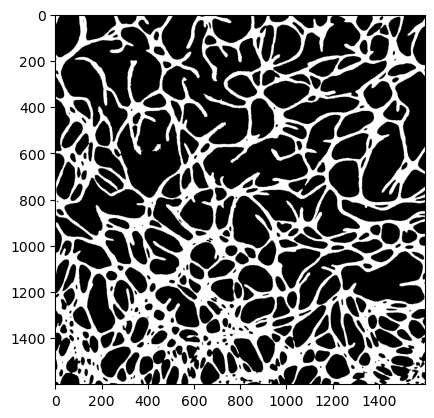

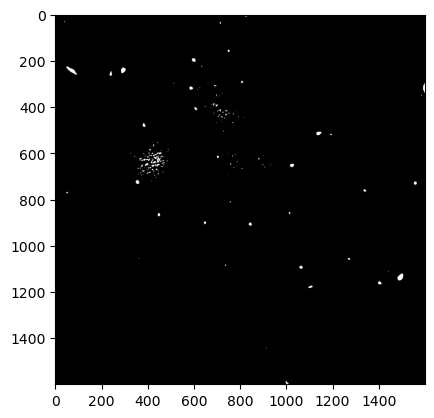

In [5]:
#Get rid of small areas
ensmallend = remove_small_objects(bw, min_size = 600, connectivity=8)
plt.imshow(ensmallend, cmap = 'gray')
diff = bw ^ ensmallend
plt.figure()
plt.imshow(diff, cmap='gray')

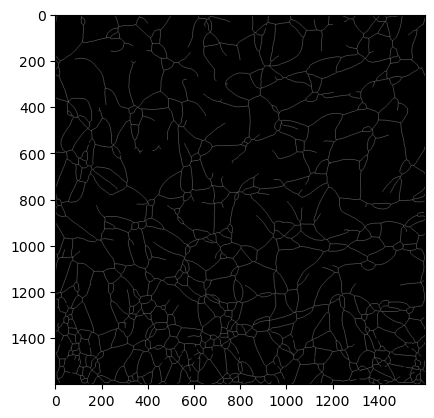

In [6]:
skel = skeletonize(ensmallend)
plt.imshow(skel, cmap='gray')

In [8]:
import skimage
skimage.io.imsave("C:\\Users\\harry\\Downloads\\skel.tiff", skel)

C:\Users\harry\AppData\Local\Temp\ipykernel_7728\1435840419.py:2: UserWarning: C:\Users\harry\Downloads\skel.tiff is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave("C:\\Users\\harry\\Downloads\\skel.tiff", skel)


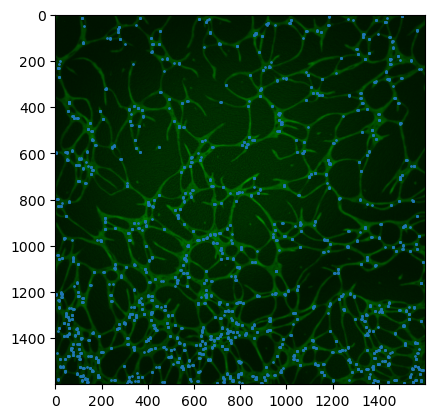

In [55]:
import skan.csr
import scipy, numpy
degree = skan.csr.make_degree_image(skel) > 2
positions = numpy.nonzero(degree)


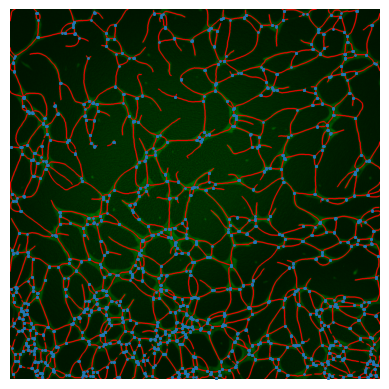

In [56]:
from skan import draw
fig, ax = plt.subplots()
draw.overlay_skeleton_2d(img, skel, dilate=2, axes=ax)
plt.scatter(positions[1], positions[0], s=1)